In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

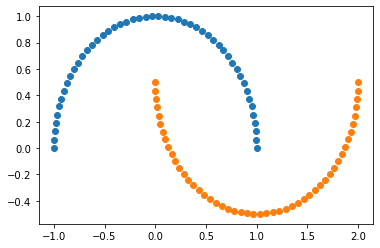

(100, 2)

In [4]:
X, y = datasets.make_moons()
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()
X.shape

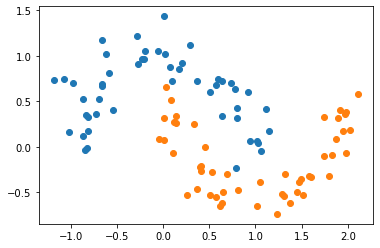

(100, 2)

In [6]:
# Add noise to sample
X, y = datasets.make_moons(noise=0.15, random_state=600)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()
X.shape

In [10]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

def PolynomialSVC(degree, C=1.0):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("linearSVC", LinearSVC(C=C))
    ])

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/Users/ada/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'linewidth'


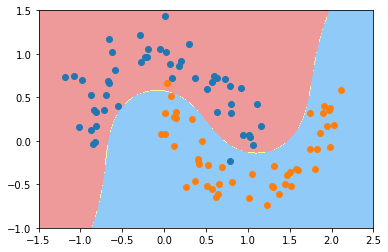

In [13]:
poly_svc = PolynomialSVC(degree=3)
poly_svc.fit(X, y)

plot_decision_boundary(poly_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## Use polynomial kernal SVC

In [18]:
from sklearn.svm import SVC
def PolynomialKernelSVC(degree, C=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("kernelSVC", SVC(kernel='poly', degree=degree, C=C))
    ])

/Users/ada/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'linewidth'


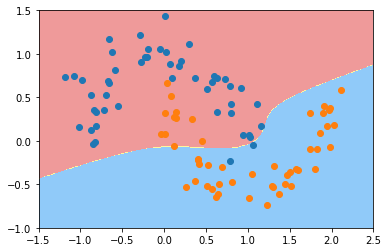

In [21]:
poly_kernal_svc = PolynomialKernelSVC(degree=3)
poly_kernal_svc.fit(X, y)

plot_decision_boundary(poly_kernal_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## Gaussian kernal function
### For m samples, each of which has n features, this kernel function can map m * n dimension to m * m
### Thus, this function is suitable for cases whose m < n (for many NLP problems)

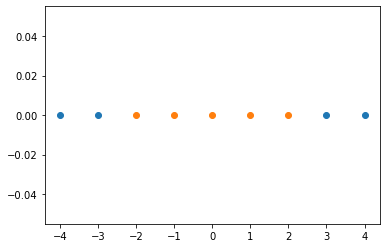

In [25]:
x = np.arange(-4,5,1)
y = np.array(((x >= -2) & (x <= 2)), dtype='int')
plt.scatter(x[y == 0], [0]*len(x[y==0]))
plt.scatter(x[y == 1], [0]*len(x[y==1]))
plt.show()

In [32]:
def gaussian(x, l):
    gamma = 1.0
    return np.exp(-gamma * (x-l)**2)

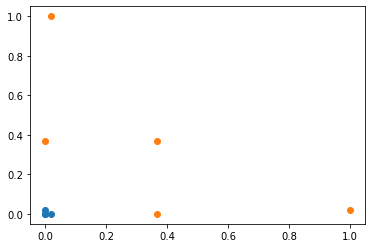

In [33]:
l1, l2 = -1, 1
x_new = np.empty((len(x), 2))
for i, data in enumerate(x):
    x_new[i, 0] = gaussian(data, l1)
    x_new[i, 1] = gaussian(data, l2)
    
plt.scatter(x_new[y == 0, 0], x_new[y==0, 1])
plt.scatter(x_new[y == 1, 0], x_new[y==1, 1])
plt.show()

#

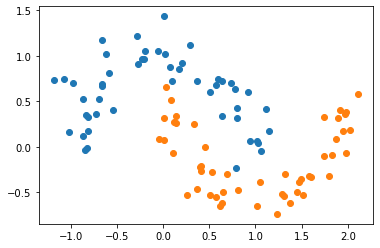

(100, 2)

In [34]:
X, y = datasets.make_moons(noise=0.15, random_state=600)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()
X.shape

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("svc", SVC(kernel="rbf", gamma=gamma))
    ])


def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/Users/ada/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'linewidth'


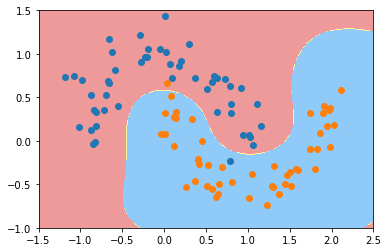

In [39]:
svc = RBFKernelSVC(gamma=1.0)
svc.fit(X,y)
plot_decision_boundary(svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

/Users/ada/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'linewidth'


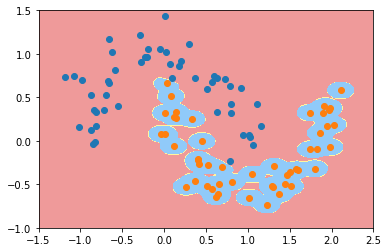

In [41]:
# High gamma may leads to overfitting
svc_gamma100 = RBFKernelSVC(gamma=100)
svc_gamma100.fit(X,y)
plot_decision_boundary(svc_gamma100, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

/Users/ada/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'linewidth'


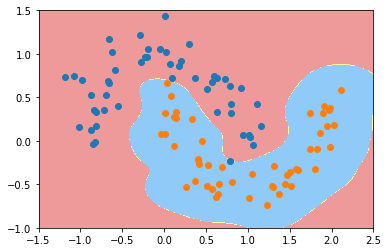

In [42]:
svc_gamma10 = RBFKernelSVC(gamma=10)
svc_gamma10.fit(X,y)
plot_decision_boundary(svc_gamma10, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

/Users/ada/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'linewidth'


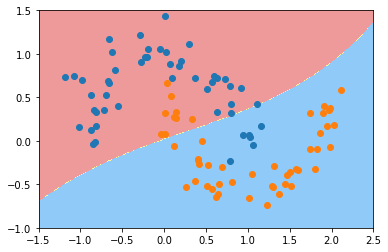

In [45]:
# Under-fitting
svc_gamma01 = RBFKernelSVC(gamma=0.1)
svc_gamma01.fit(X,y)
plot_decision_boundary(svc_gamma01, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## SVM Regression

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

boston = datasets.load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [2]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def StandardLinearSVR(epsilon=0.1):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("linear_SVR", LinearSVR(epsilon=epsilon))
    ])

In [3]:
svr = StandardLinearSVR()
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

0.6361300908842837